In [58]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load the data

In [59]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [60]:
y.shape, tx.shape

((10000,), (10000, 2))

### NB: throughout this laboratory the data has the following format: 
  * there are **N = 10000** data entries
  * **y** represents the column vector containing weight information -- that which we wish to predict/the output (see also the first page of $\texttt{exercise02.pdf}$). Its **shape** is **(N,)**.
  * **tx** represents the matrix $\tilde{X}$ formed by laterally concatenating a column vector of 1s to the column vector of height information -- the input data (see also the first page of $\texttt{exercise02.pdf}$). Its **shape** is **(N,2)**.

# 1. Computing the Cost Function
Fill in the `compute_loss` function below:

In [61]:
def compute_loss(y, tx, w):
    """Calculate the loss using either MSE or MAE.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2,). The vector of model parameters.

    Returns:
        the value of the loss (a scalar), corresponding to the input parameters w.
    """
    N = len(y)
    e = y - tx @ w
    return np.dot(e,e)/(2*N)

# 2. Grid Search

Fill in the function `grid_search()` below:

In [62]:
# from costs import *


def grid_search(y, tx, grid_w0, grid_w1):
    """Algorithm for grid search.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        grid_w0: numpy array of shape=(num_grid_pts_w0, ). A 1D array containing num_grid_pts_w0 values of parameter w0 to be tested in the grid search.
        grid_w1: numpy array of shape=(num_grid_pts_w1, ). A 1D array containing num_grid_pts_w1 values of parameter w1 to be tested in the grid search.

    Returns:
        losses: numpy array of shape=(num_grid_pts_w0, num_grid_pts_w1). A 2D array containing the loss value for each combination of w0 and w1
    """

    losses = np.zeros((len(grid_w0), len(grid_w1)))
    for i, w0 in enumerate(grid_w0):
        for j, w1 in enumerate(grid_w1):
            loss = compute_loss(y, tx, np.array([w0,w1]))
            losses[i,j] = loss
                                
            
    
    return losses

Let us play with the grid search demo now!

Grid Search: loss*=377.54061265390834, w0*=50.0, w1*=0.0, execution time=0.001 seconds


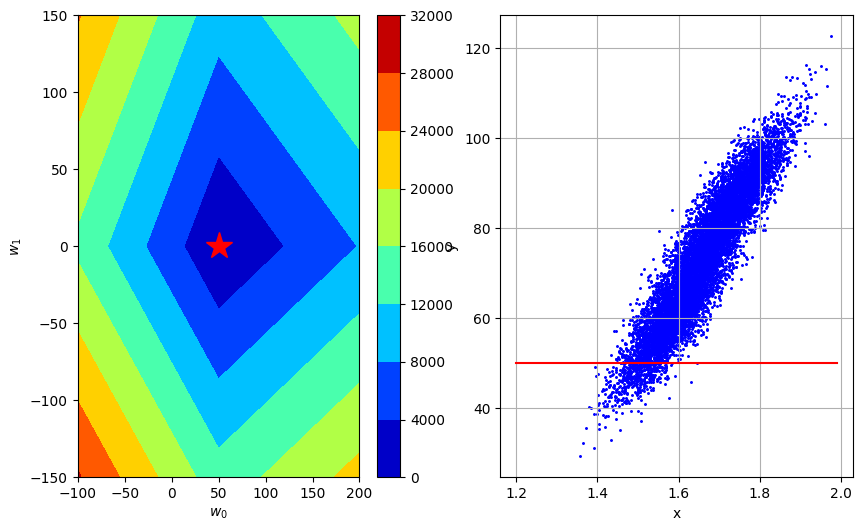

In [63]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=3)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print(
    "Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
        l=loss_star, w0=w0_star, w1=w1_star, t=execution_time
    )
)

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0, 6.0)
fig.savefig("grid_plot")  # Optional saving

# 3. Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [64]:
def compute_gradient(y, tx, w):
    """Computes the gradient at w.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2, ). The vector of model parameters.

    Returns:
        An numpy array of shape (2, ) (same shape as w), containing the gradient of the loss at w.
    """
    N = len(y)
    e = y - tx @ w
    tx_T = np.transpose(tx)
    gd = tx_T @ e
    

    return (-1/N) * gd
    
y_prime = np.array([110, 73, 96])
tx_prime = np.array([[1, 19], [1, 6], [1, 20]])
w_prime = np.array([2,3])

# Precomputed by hand, the DG should be the following
# GD_prime = np.array([-46, -655.667])
compute_gradient(y_prime, tx_prime, w_prime)

print(compute_gradient(y, tx, np.array([100, 20])))
print(compute_gradient(y, tx, np.array([50, 10])))
print(compute_gradient(y, tx, np.array([70, 15])))
print(compute_gradient(y, tx, np.array([73.298, 13.48])))

[26.706078    6.52028757]
[-23.293922    -3.47971243]
[-3.293922    1.52028757]
[0.004078   0.00028757]


Please fill in the functions `gradient_descent` below:

In [65]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """The Gradient Descent (GD) algorithm.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        max_iters: a scalar denoting the total number of iterations of GD
        gamma: a scalar denoting the stepsize

    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of GD
        ws: a list of length max_iters + 1 containing the model parameters as numpy arrays of shape (2, ),
            for each iteration of GD (as well as the final weights)
    """
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: compute gradient and loss
        # ***************************************************
        gradient = compute_gradient(y, tx, w)
        loss = compute_loss(y, tx, w)
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: update w by gradient
        # ***************************************************
        w = w - gamma * gradient
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print(
            "GD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
                bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]
            )
        )

    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [66]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
gd_losses, gd_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("GD: execution time={t:.3f} seconds".format(t=exection_time))

GD iter. 0/49: loss=2792.236712759168, w0=51.30574540147368, w1=9.435798704492349
GD iter. 1/49: loss=265.3024621089587, w0=66.69746902191575, w1=12.26653831584002
GD iter. 2/49: loss=37.87837955044096, w0=71.31498610804836, w1=13.115760199244335
GD iter. 3/49: loss=17.410212120174446, w0=72.70024123388815, w1=13.370526764265632
GD iter. 4/49: loss=15.568077051450446, w0=73.11581777164008, w1=13.446956733772025
GD iter. 5/49: loss=15.402284895265291, w0=73.24049073296565, w1=13.469885724623941
GD iter. 6/49: loss=15.38736360120863, w0=73.27789262136334, w1=13.476764421879516
GD iter. 7/49: loss=15.386020684743528, w0=73.28911318788263, w1=13.478828031056189
GD iter. 8/49: loss=15.38589982226167, w0=73.29247935783842, w1=13.47944711380919
GD iter. 9/49: loss=15.385888944638301, w0=73.29348920882515, w1=13.47963283863509
GD iter. 10/49: loss=15.385887965652204, w0=73.29379216412117, w1=13.479688556082861
GD iter. 11/49: loss=15.385887877543452, w0=73.29388305071, w1=13.479705271317192
GD

interactive(children=(IntSlider(value=28, description='n_iter', max=51, min=28), Output()), _dom_classes=('wid…

<function __main__.plot_figure(n_iter)>

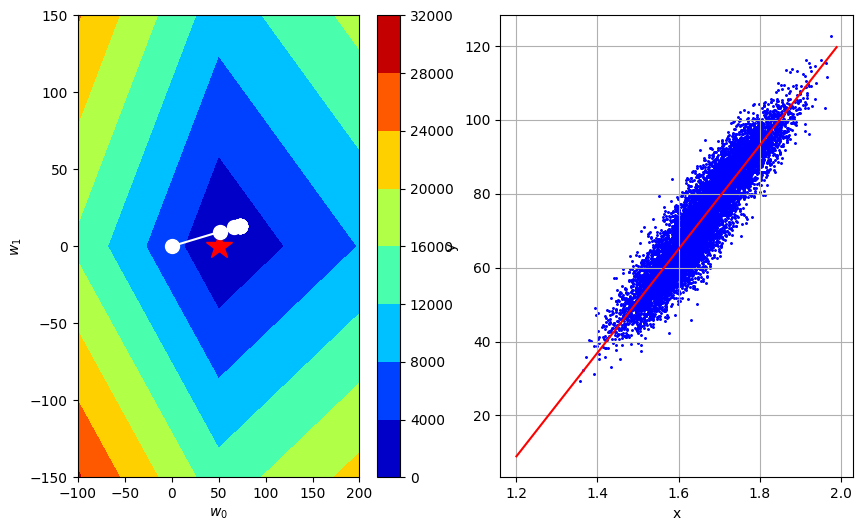

In [67]:
# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gd_losses,
        gd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=28, max=len(gd_ws)))

# 4. Stochastic gradient descent

In [12]:
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient at w from a data sample batch of size B, where B < N, and their corresponding labels.

    Args:
        y: numpy array of shape=(B, )
        tx: numpy array of shape=(B,2)
        w: numpy array of shape=(2, ). The vector of model parameters.

    Returns:
        A numpy array of shape (2, ) (same shape as w), containing the stochastic gradient of the loss at w.
    """

    return compute_gradient(y, tx, w)


def stochastic_gradient_descent(y, tx, initial_w, batch_size, max_iters, gamma):
    """The Stochastic Gradient Descent algorithm (SGD).

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        batch_size: a scalar denoting the number of data points in a mini-batch used for computing the stochastic gradient
        max_iters: a scalar denoting the total number of iterations of SGD
        gamma: a scalar denoting the stepsize

    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SGD
    """

    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w

    for n_iter, (minibatch_y, minibatch_tx) in enumerate(batch_iter(y, tx, batch_size, max_iters)):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: implement stochastic gradient descent.
        # ***************************************************
        
            

        gradient = compute_gradient(minibatch_y, minibatch_tx, w)
        loss = compute_loss(minibatch_y, minibatch_tx, w)
        w = w - gamma * gradient
        # store w and loss
        ws.append(w)
        losses.append(loss)

        print(
            "SGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
                bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]
            )
        )
        if n_iter >= max_iters - 1:
            break
    return losses, ws

In [13]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7
batch_size = 5

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma
)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

SGD iter. 0/49: loss=4106.3500408543205, w0=63.030018834297486, w1=65.18812056829256
SGD iter. 1/49: loss=2252.352666150872, w0=104.4463860770746, w1=14.71549439085181
SGD iter. 2/49: loss=490.81786555048336, w0=83.44281887736729, w1=29.81508958685334
SGD iter. 3/49: loss=148.14596385784807, w0=83.3018010453704, w1=19.46970182213137
SGD iter. 4/49: loss=148.66471426754072, w0=71.60158036805437, w1=2.1661652635233217
SGD iter. 5/49: loss=108.93516426509468, w0=62.251228130992125, w1=17.667277245270313
SGD iter. 6/49: loss=43.93419669708123, w0=68.20410746818928, w1=14.12277551811697
SGD iter. 7/49: loss=48.63929789908779, w0=72.53241769149311, w1=10.633304780713472
SGD iter. 8/49: loss=8.360228401487138, w0=74.957434390823, w1=11.961636482050421
SGD iter. 9/49: loss=18.923819057107977, w0=71.73846287516345, w1=13.318630679084091
SGD iter. 10/49: loss=40.6140666541462, w0=75.59415334840573, w1=10.402577073219414
SGD iter. 11/49: loss=7.85166903170405, w0=77.29280706248502, w1=10.26574521

interactive(children=(IntSlider(value=51, description='n_iter', max=153, min=-51), Output()), _dom_classes=('w…

<function __main__.plot_figure(n_iter)>

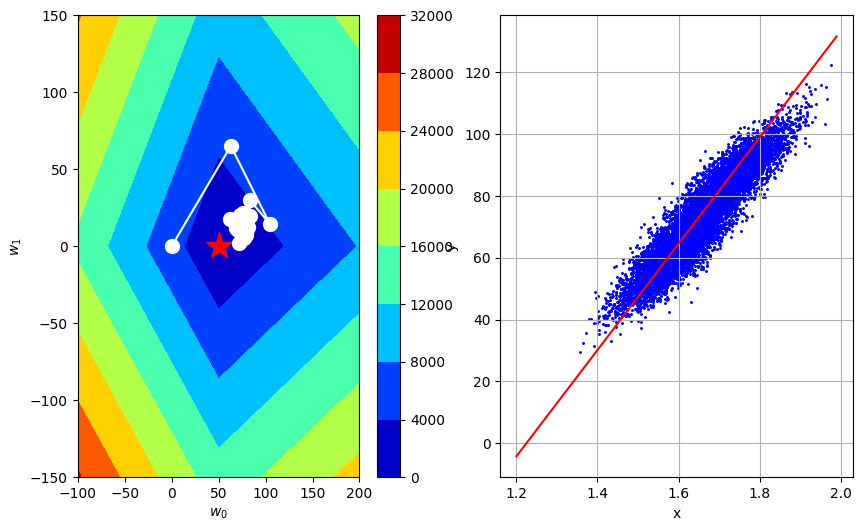

In [14]:
# Time Visualization
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses,
        sgd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=len(sgd_ws))

# 5. Effect of Outliers and MAE Cost Function

In [15]:
import datetime
from helpers import *

# ***************************************************
# INSERT YOUR CODE HERE
# TODO: reload the data by subsampling first, then by subsampling and adding outliers
# ***************************************************
height, weight, gender = load_data(sub_sample=True, add_outlier=True)

x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [16]:
y.shape, tx.shape

((202,), (202, 2))

In [17]:
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()

# ***************************************************
# INSERT YOUR CODE HERE
# TODO: fit the model to the subsampled data / subsampled data with outliers and visualize the cloud of points
#       and the model fit
# ***************************************************
gd_losses, gd_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)

end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("GD: execution time={t:.3f} seconds".format(t=exection_time))

GD iter. 0/49: loss=2869.8351145358533, w0=51.847464098448484, w1=7.724426406192441
GD iter. 1/49: loss=318.28212470159497, w0=67.401703327983, w1=10.041754328050121
GD iter. 2/49: loss=88.6423556165126, w0=72.06797509684336, w1=10.736952704607413
GD iter. 3/49: loss=67.9747763988552, w0=73.46785662750146, w1=10.945512217574594
GD iter. 4/49: loss=66.11469426926604, w0=73.88782108669889, w1=11.00808007146475
GD iter. 5/49: loss=65.94728687760302, w0=74.01381042445813, w1=11.026850427631796
GD iter. 6/49: loss=65.93222021235334, w0=74.05160722578589, w1=11.03248153448191
GD iter. 7/49: loss=65.93086421248087, w0=74.06294626618423, w1=11.034170866536943
GD iter. 8/49: loss=65.93074217249236, w0=74.06634797830372, w1=11.034677666153454
GD iter. 9/49: loss=65.93073118889338, w0=74.06736849193958, w1=11.034829706038407
GD iter. 10/49: loss=65.93073020036948, w0=74.06767464603033, w1=11.034875318003893
GD iter. 11/49: loss=65.93073011140233, w0=74.06776649225756, w1=11.034889001593537
GD ite

interactive(children=(IntSlider(value=51, description='n_iter', max=51, min=51), Output()), _dom_classes=('wid…

<function __main__.plot_figure(n_iter)>

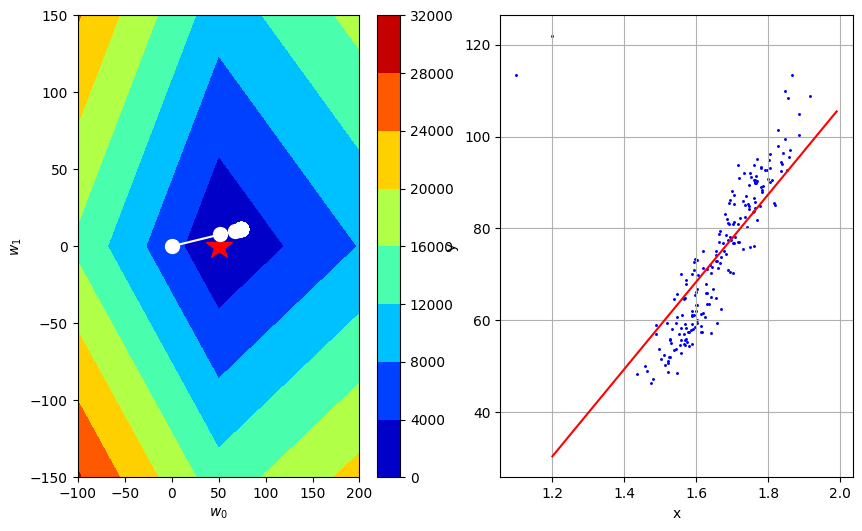

In [18]:
# Time Visualization
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gd_losses,
        gd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=len(gd_ws), max=len(gd_ws)))

# 6. Subgradient descent

In [50]:
def compute_loss(y, tx, w):
    """Calculate the loss using MAE.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2,). The vector of model parameters.

    Returns:
        the value of the loss (a scalar), corresponding to the input parameters w.
    """
    N = len(y)
    e = np.absolute(y - tx @ w)
    return np.sum(e)/N

def compute_subgradient_mae(y, tx, w):
    """Compute a subgradient of the MAE at w.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2, ). The vector of model parameters.

    Returns:
        A numpy array of shape (2, ) (same shape as w), containing the subgradient of the MAE at w.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute subgradient gradient vector for MAE
    # ***************************************************
    N = y.shape[0]
    e = y - tx @ w
    sgn = np.sign(e)
    if 0 in sgn:
        print(sgn)
    
    return (-1/N)* tx.T @ sgn
    

In [51]:
def subgradient_descent(y, tx, initial_w, max_iters, gamma):
    """The SubGradient Descent (SubGD) algorithm.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        max_iters: a scalar denoting the total number of iterations of GD
        gamma: a scalar denoting the stepsize

    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SubGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SubGD
    """
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: compute subgradient and loss
        # ***************************************************
        sgd = compute_subgradient_mae(y, tx, w)
        loss = compute_loss(y, tx, w)
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: update w by subgradient
        # ***************************************************
        w = w - gamma * sgd

        ws.append(w)
        losses.append(loss)
        print(
            "SubGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
                bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]
            )
        )

    return losses, ws

In [52]:
# Define the parameters of the algorithm.
max_iters = 500
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SubSGD.
start_time = datetime.datetime.now()
subgd_losses, subgd_ws = subgradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SubGD: execution time={t:.3f} seconds".format(t=exection_time))

SubGD iter. 0/499: loss=74.06780585492638, w0=0.7000000000000004, w1=7.625844400394043e-16
SubGD iter. 1/499: loss=73.36780585492637, w0=1.4000000000000008, w1=1.5251688800788087e-15
SubGD iter. 2/499: loss=72.66780585492637, w0=2.1000000000000014, w1=2.287753320118213e-15
SubGD iter. 3/499: loss=71.96780585492637, w0=2.8000000000000016, w1=3.0503377601576174e-15
SubGD iter. 4/499: loss=71.26780585492638, w0=3.5000000000000018, w1=3.812922200197022e-15
SubGD iter. 5/499: loss=70.56780585492638, w0=4.200000000000002, w1=4.575506640236426e-15
SubGD iter. 6/499: loss=69.86780585492637, w0=4.900000000000002, w1=5.3380910802758305e-15
SubGD iter. 7/499: loss=69.16780585492637, w0=5.600000000000002, w1=6.100675520315235e-15
SubGD iter. 8/499: loss=68.46780585492637, w0=6.3000000000000025, w1=6.863259960354639e-15
SubGD iter. 9/499: loss=67.76780585492638, w0=7.000000000000003, w1=7.625844400394044e-15
SubGD iter. 10/499: loss=67.06780585492638, w0=7.700000000000003, w1=8.388428840433449e-15


interactive(children=(IntSlider(value=501, description='n_iter', max=501, min=501), Output()), _dom_classes=('…

<function __main__.plot_figure(n_iter)>

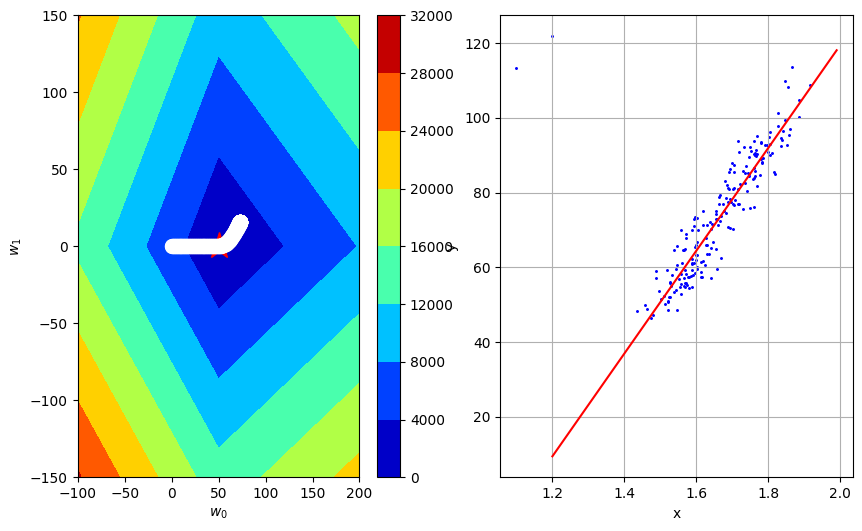

In [53]:
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        subgd_losses,
        subgd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=len(subgd_ws), max=len(subgd_ws)))

# Stochastic Subgradient Descent

**NB** for the computation of the subgradient you can reuse the `compute_subgradient` method that you implemented above, just making sure that you pass in a minibatch as opposed to the full data.

In [54]:
def stochastic_subgradient_descent(y, tx, initial_w, batch_size, max_iters, gamma):
    """Compute a stochastic subgradient at w from a data sample batch of size B, where B < N, and their corresponding labels.

    Args:
        y: numpy array of shape=(B, )
        tx: numpy array of shape=(B,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        batch_size: a scalar denoting the number of data points in a mini-batch used for computing the stochastic subgradient
        max_iters: a scalar denoting the total number of iterations of SubSGD
        gamma: a scalar denoting the stepsize

    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SubSGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SubSGD
    """

    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w

    for n_iter, (minibatch_y, minibatch_tx) in enumerate(batch_iter(y, tx, batch_size, max_iters)):
        gradient = compute_subgradient_mae(minibatch_y, minibatch_tx, w)
        loss = compute_loss(minibatch_y, minibatch_tx, w)
        w = w - gamma * gradient
        # store w and loss
        ws.append(w)
        losses.append(loss)

        print(
            "SubSGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
                bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]
            )
        )
    return losses, ws

In [55]:
# Define the parameters of the algorithm.
max_iters = 500
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SubSGD.
start_time = datetime.datetime.now()
subsgd_losses, subsgd_ws = stochastic_subgradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma
)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SubSGD: execution time={t:.3f} seconds".format(t=exection_time))

SubSGD iter. 0/499: loss=67.92137613629475, w0=0.7, w1=-0.5271886387472271
SubSGD iter. 1/499: loss=53.615416930314844, w0=1.4, w1=-1.0743509409810974
SubSGD iter. 2/499: loss=91.53018891916614, w0=2.0999999999999996, w1=-0.5333938890099552
SubSGD iter. 3/499: loss=43.39014950128542, w0=2.8, w1=-1.659326302511126
SubSGD iter. 4/499: loss=60.32432797866839, w0=3.5, w1=-1.8411901460862947
SubSGD iter. 5/499: loss=64.91492416626173, w0=4.2, w1=-2.4603313015006774
SubSGD iter. 6/499: loss=39.43192128734616, w0=4.9, w1=-3.814288195533905
SubSGD iter. 7/499: loss=54.43931030555183, w0=5.6000000000000005, w1=-3.8280433915093957
SubSGD iter. 8/499: loss=86.73761211210595, w0=6.300000000000001, w1=-3.082057737921999
SubSGD iter. 9/499: loss=90.27929067844164, w0=7.000000000000001, w1=-2.3638944138908107
SubSGD iter. 10/499: loss=105.45088743191064, w0=7.700000000000001, w1=-5.1341941107798
SubSGD iter. 11/499: loss=90.54691595804293, w0=8.4, w1=-4.521201613596241
SubSGD iter. 12/499: loss=56.32

interactive(children=(IntSlider(value=501, description='n_iter', max=501, min=501), Output()), _dom_classes=('…

<function __main__.plot_figure(n_iter)>

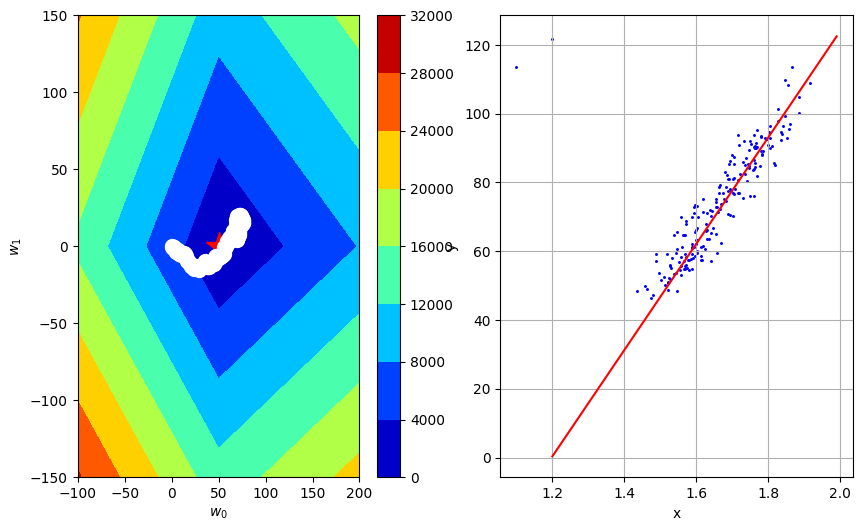

In [57]:
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        subsgd_losses,
        subsgd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=len(subsgd_ws), max=len(subsgd_ws)))